In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTree Classifier 생성
#max_depth=3, dt_clf = DecisionTreeClassifier(random_state=156, max_depth=3)
dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=11)

dt_clf.fit(X_train,y_train)


DecisionTreeClassifier(random_state=156)

In [12]:
from sklearn.tree import export_graphviz

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf,out_file="tree.dot",class_names=iris_data.target_names, \
                feature_names=iris_data.feature_names,impurity=True,filled=True)

In [ ]:
import graphviz

#위에서 생성된 tree.dot file을 Graphviz가 읽어서 jupyter notebook상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025005
sepal width (cm) : 0.000000
petal length (cm) : 0.554903
petal width (cm) : 0.420092


<AxesSubplot:>

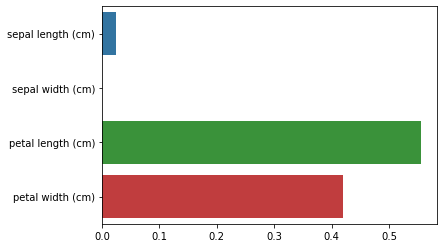

In [14]:
#feature_importances_
import seaborn as sns
import numpy as np
%matplotlib inline

#feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_,3)))

#feature별 importance 매핑
for name,value in zip(iris_data.feature_names,dt_clf.feature_importances_):
    print('{0} : {1:3f}'.format(name,value))
    
#feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_,y=iris_data.feature_names)


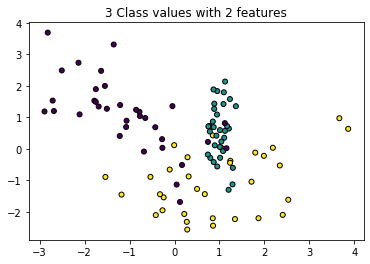

In [14]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 features")

#2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2,n_redundant=0,n_informative=2, \
                                           n_classes=3,n_clusters_per_class=1,random_state=0)

#그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0],X_features[:,1],marker='o',c=y_labels,s=25,edgecolor='k')

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#feature.txt file에는 index와 feature 이름이 공백으로 분리되어 있음.
#이를 DataFrame으로 load
feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',\
                             header=None,names=['column_index','column_name'])

#feature명 index를 제거하고 feature name만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 feature name에서 10개만 추출:',feature_name[:10])
print()


전체 feature name에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']



In [16]:
#중복되는 feature명 확인
feature_duplicate_df = feature_name_df.groupby('column_name').count()
print(feature_duplicate_df.head(10))
print(feature_duplicate_df[feature_duplicate_df['column_index']>1].count())
feature_duplicate_df[feature_duplicate_df['column_index']>1].head()
print()
feature_duplicate_df = pd.DataFrame(data=feature_name_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
print(feature_duplicate_df.tail(65))


                                      column_index
column_name                                       
angle(X,gravityMean)                             1
angle(Y,gravityMean)                             1
angle(Z,gravityMean)                             1
angle(tBodyAccJerkMean),gravityMean)             1
angle(tBodyAccMean,gravity)                      1
angle(tBodyGyroJerkMean,gravityMean)             1
angle(tBodyGyroMean,gravityMean)                 1
fBodyAcc-bandsEnergy()-1,16                      3
fBodyAcc-bandsEnergy()-1,24                      3
fBodyAcc-bandsEnergy()-1,8                       3
column_index    42
dtype: int64

     dup_cnt
496        2
497        2
498        2
499        2
500        2
..       ...
556        0
557        0
558        0
559        0
560        0

[65 rows x 1 columns]


In [17]:
#중복되는 feature명 바꾸기
#https://www.kaggle.com/jinameliachoi/tutorial-human-activity-recognition-smartphone/notebook
def change_feature_name(old_feature_name_df):
    #cumcount는 cumalative하게 count, 
    #column_name에 있는 element가 몇번째로 중복이 되었는지 숫자로 반환
    #0번 중복되면 0
    feature_duplicate_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
    #index 기본형으로 reset, column_name은 옆으로 밀려남
    feature_duplicate_df = feature_duplicate_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(),feature_duplicate_df,how='outer')
    #changing name and changing the elements in column_name
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)
    #drop index
    new_feature_name_df = new_feature_name_df.drop(['index'],axis=1)
    return new_feature_name_df
    

In [18]:
#get_human_dataset() 함수 생성

def get_human_dataset():
    
    #각 data file들은 공백으로 분리가 되어있으므로 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+', \
                                 header=None,names=['column_index','column_name'])
    
    #change_feature_name 적용
    feature_name_df = change_feature_name(feature_name_df)
    #DataFrame에 feature name을 column으로 부여하기 위해 list 객체로 다시 변환
    feature_name = feature_name_df.iloc[:,1].values.tolist()
    
    #train feature dataset와 test feature dataset를 DataFrame으로 로딩
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+',names=feature_name)
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+',names=feature_name)
    
    #train label과 test label data를 DataFrame으로 로딩하고 column name은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+', \
                          header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+', \
                          header=None,names=['action'])
    
    #로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train,X_test,y_train,y_test
?
X_train,X_test,y_train,y_test = get_human_dataset()
print('## train feature dataset info()')
print(X_train.info())

## train feature dataset info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [19]:
print(y_train['action'].value_counts())
#label 값이 고르게 분포

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('DecisionTree 예측 정확도: {0:4f}'.format(accuracy))

#DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n',dt_clf.get_params())

DecisionTree 예측 정확도: 0.854768
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [21]:
#max_depth parameter를 늘리면서 예측 성능 측정
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth':[6,8,10,12,16,20,24]
}

grid_cv = GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=5,verbose=1,return_train_score=True)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:',grid_cv.best_params_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.851344
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [22]:
#cv_results_ 속성은 mean_test_score와 mean_train_score값을 가지고 있다
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
print(cv_results_df.head())
#mean_train_score를 출력할거면 GridSearchCV에 return_train_score=True를 해야한다
cv_results_df[['param_max_depth','mean_test_score','mean_train_score']]

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.309473      0.024790         0.003987        0.000466   
1       1.638387      0.026011         0.003805        0.000338   
2       1.936314      0.051714         0.003640        0.000103   
3       2.161207      0.100943         0.003661        0.000107   
4       2.428297      0.173127         0.003657        0.000274   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               6   {'max_depth': 6}           0.813732           0.872876   
1               8   {'max_depth': 8}           0.820530           0.819850   
2              10  {'max_depth': 10}           0.799456           0.814412   
3              12  {'max_depth': 12}           0.794697           0.813052   
4              16  {'max_depth': 16}           0.799456           0.818491   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.819728           0.865986  ...   

,param_max_depth,mean_test_score,mean_train_score
0,6,0.850791,0.944879
1,8,0.851069,0.982692
2,10,0.851209,0.993403
3,12,0.844135,0.997212
4,16,0.851344,0.999660
5,20,0.850800,0.999966
6,24,0.849440,1.000000


In [23]:
max_depths = [6,8,10,12,16,20,24]
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth,random_state=156)
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test,pred)
    print('max_depth = {0} accuracy: {1:4f}'.format(depth,accuracy))

max_depth = 6 accuracy: 0.855786
max_depth = 8 accuracy: 0.870716
max_depth = 10 accuracy: 0.867323
max_depth = 12 accuracy: 0.864608
max_depth = 16 accuracy: 0.857482
max_depth = 20 accuracy: 0.854768
max_depth = 24 accuracy: 0.854768


In [24]:
#max_depth와 min_sample_split을 같이 변경하면서 정확도 성능 튜닝
params = {
    'max_depth':[8,12,16,20],
    'min_samples_split':[16,24],
}

grid_cv = GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:',grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.854879
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [25]:
#best_estimator_로 test data 예측 수행
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred1)
print('DecisionTree 예측 정확도: {0:4f}'.format(accuracy))


DecisionTree 예측 정확도: 0.871734


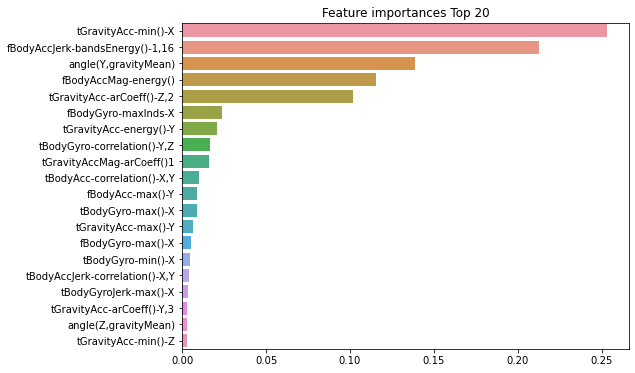

In [26]:
#중요도 높은 feature를 막대그래프로 출력
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
#series로 변환
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
#중요도값 순으로 Series 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()